In [109]:
from mnist import MNIST
import numpy as np, scipy, seaborn as sns
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

     0      1      2      3      4      5      6      7      8      9


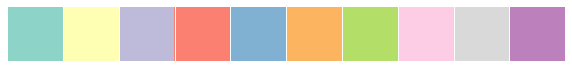

In [180]:
sns.palplot(sns.color_palette("Set3", n_colors=10, desat=1))
print "     " + "      ".join(str(w) for w in xrange(10))

In [2]:
mndata = MNIST('../data')
TrainingData = mndata.load_training()
TestData     = mndata.load_testing()

In [3]:
X_train = np.array(TrainingData[0])
Y_train = np.array(TrainingData[1])
X_test  = np.array(TestData[0])
Y_test  = np.array(TestData[1])

the number shoud be 5


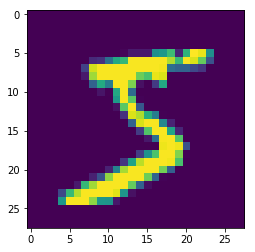

In [24]:
def Visualize(a):
    data = a.reshape((28, 28))
    imshow(data)
Visualize(X_train[0])
print "the number shoud be", Y_train[0]

In [244]:
X_std = StandardScaler().fit_transform(X_train)

Test sklearn.decomposition.PCA

In [286]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_std.T)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [287]:
pca_score = pca.explained_variance_ratio_
pca_score

array([ 0.04677604,  0.04143171,  0.0381674 ])

In [ ]:
V = pca.components_
V.shape

(3L, 60000L)

In [ ]:
sns.palplot(sns.color_palette("Set3", n_colors=10, desat=1))
print "     " + "      ".join(str(w) for w in xrange(10))
num = 30000
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(V[0][:num], V[1][:num], V[2][:num], \
           c=[sns.color_palette("Set3", n_colors=10, desat=1)[w] for w in Y_train[:num]],\
           marker='o', s = 7)

     0      1      2      3      4      5      6      7      8      9


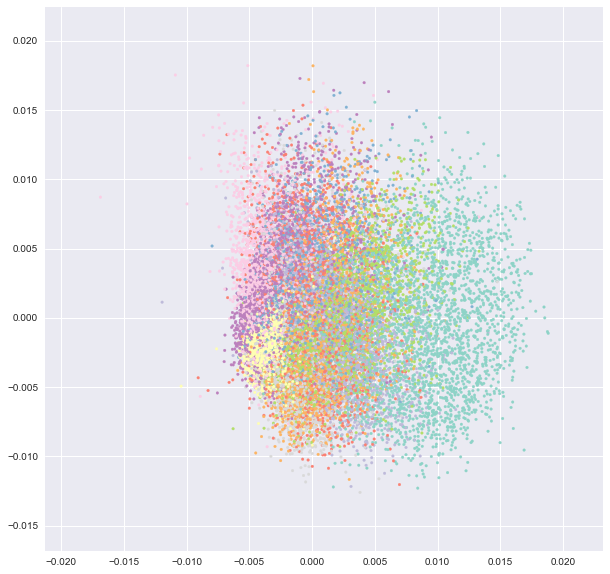

In [194]:
num = 30000
fig = plt.figure(figsize=(10, 10))
plt.scatter(V[0][:num], V[1][:num], \
           c=[sns.color_palette("Set3", n_colors=10, desat=1)[w] for w in Y_train[:num]],\
           marker='o', s = 7)

Test SVD PCA

In [181]:
u,s,v = scipy.sparse.linalg.svds(X_std, k=3)
print u.shape, s.shape, v.shape

(60000L, 3L) (3L,) (3L, 784L)


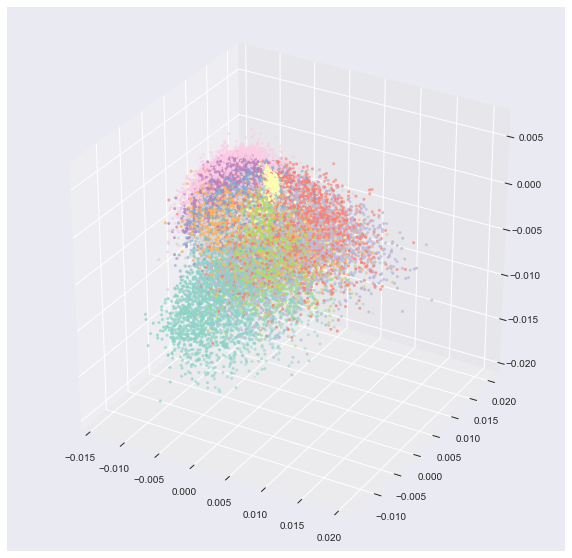

In [182]:
num = 30000
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u.T[0][:num], u.T[1][:num], u.T[2][:num], \
           c=[sns.color_palette("Set3", n_colors=10, desat=1)[w] for w in Y_train[:num]],\
           marker='o', s = 7)

In [183]:
u,s,v = scipy.sparse.linalg.svds(X_std, k=2)
print u.shape, s.shape, v.shape

(60000L, 2L) (2L,) (2L, 784L)


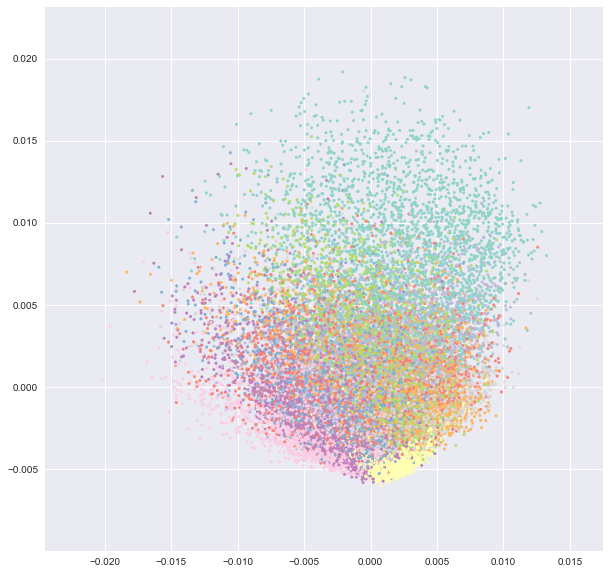

In [184]:
num = 30000
fig = plt.figure(figsize=(10, 10))
plt.scatter(u.T[0][:num], u.T[1][:num], \
           c=[sns.color_palette("Set3", n_colors=10, desat=1)[w] for w in Y_train[:num]],\
           marker='o', s = 7)

Normal Approach

In [279]:
cov_mat = np.cov(X_train.T)
print('NumPy covariance matrix: \n%s' %cov_mat)

NumPy covariance matrix: 
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [280]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]

Eigenvalues 
[  3.32724667e+05   2.43283939e+05   2.11507367e+05   1.84776386e+05
   1.66926831e+05   1.47844962e+05   1.12178203e+05   9.88744296e+04
   9.46962491e+04   8.08098245e+04   7.23136203e+04   6.93583013e+04
   5.88268711e+04   5.80140840e+04   5.41237569e+04   5.08430685e+04
   4.54126063e+04   4.37784591e+04   4.07053405e+04   3.95197904e+04
   3.65535359e+04   3.45151939e+04   3.26932861e+04   3.12865858e+04
   3.02875526e+04   2.87760784e+04   2.78592854e+04   2.69605814e+04
   2.55331936e+04   2.36861230e+04   2.25627619e+04   2.22217664e+04
   2.06606718e+04   2.01109854e+04   1.95432009e+04   1.86382921e+04
   1.73409003e+04   1.67262448e+04   1.65058174e+04   1.61916632e+04
   1.56595799e+04   1.52512141e+04   1.43483288e+04   1.36528231e+04
   1.31988643

In [281]:
temp = sorted([(eig_vals[i], eig_vecs[i]) for i in xrange(len(eig_vals))], key = lambda x: abs(x[0]), reverse = True)
eig_vals = np.array([w[0] for w in temp])
eig_vecs = np.array([w[1] for w in temp])
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]

Eigenvalues 
[  3.32724667e+05   2.43283939e+05   2.11507367e+05   1.84776386e+05
   1.66926831e+05   1.47844962e+05   1.12178203e+05   9.88744296e+04
   9.46962491e+04   8.08098245e+04   7.23136203e+04   6.93583013e+04
   5.88268711e+04   5.80140840e+04   5.41237569e+04   5.08430685e+04
   4.54126063e+04   4.37784591e+04   4.07053405e+04   3.95197904e+04
   3.65535359e+04   3.45151939e+04   3.26932861e+04   3.12865858e+04
   3.02875526e+04   2.87760784e+04   2.78592854e+04   2.69605814e+04
   2.55331936e+04   2.36861230e+04   2.25627619e+04   2.22217664e+04
   2.06606718e+04   2.01109854e+04   1.95432009e+04   1.86382921e+04
   1.73409003e+04   1.67262448e+04   1.65058174e+04   1.61916632e+04
   1.56595799e+04   1.52512141e+04   1.43483288e+04   1.36528231e+04
   1.31988643

In [282]:
eig_vecs.shape

(784L, 784L)

In [283]:
X_transformed = X_std.dot(eig_vecs.T[:2].T)

In [284]:
X_transformed

array([[-0.86511573, -2.17405659],
       [-5.21502076, -1.95114666],
       [-2.6287531 ,  7.5806383 ],
       ..., 
       [ 2.19279103,  1.32220438],
       [ 0.76739593,  0.57914831],
       [ 1.27189064,  0.09223259]])

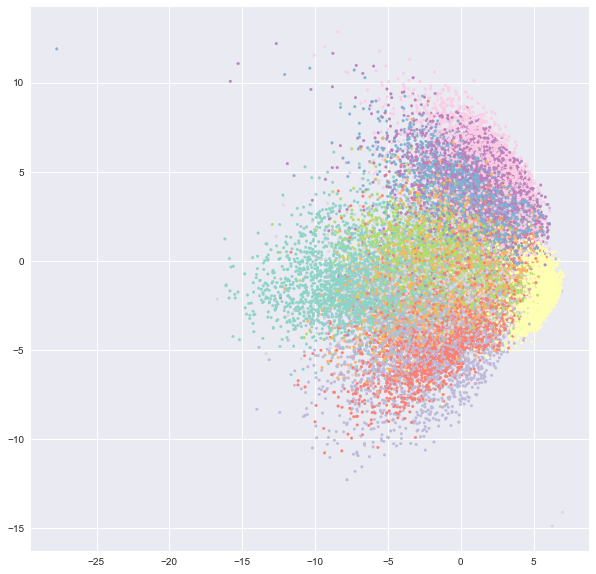

In [285]:
num = 30000
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_transformed[:num, 0], X_transformed[:num, 1], \
           c=[sns.color_palette("Set3", n_colors=10, desat=1)[w] for w in Y_train[:num]],\
           marker='o', s = 7)